In [1]:
#The difference in CAI and eta measured at random codon positions for genes without 
#-1 PRF sites and at putative slippery sites
#for mRNA containing -1 PRF sites for increasing protein expression levels

import matplotlib.pyplot as plt
import numpy as np 

expression = {}
with open('gilchrist_protein_exp.txt', 'r') as f:
    for line in f:
        s = line.strip().split()
        expression[s[0]] = float(s[1])

all_windows = [15,30,60,90,120,150,300,450,600,750,900,1050,1200, 1350,1500]


len(expression.keys())

4674

In [3]:
#split into prf and not prf: 

not_prf = []
all_names = [] 
with open('yeast_gencode_all_exons_pcs_IDs_1L_filt.fa', 'r') as f: 
    for line in f: 
        l = line.strip()
        if l.startswith('>'):
            info = l.split(':')
            gene_name = info[-1]
            all_names.append(gene_name)



prf_ids = [] 
with open('prfdb_S228C_all_nupack_unique_DNA_filtered_for_all.tsv', 'r') as g: 
    for line in g: 
        prf_ids.append(line.strip().split('\t')[0])
prf_ids = np.unique(prf_ids)


not_prf_ids = []

for x in all_names: 
    if x not in prf_ids: 
        not_prf_ids.append(x)




In [4]:
count = 0
for n in all_names:
    if n in prf_ids:
        count += 1
count
    

4261

In [5]:
#function to bin
def bin(xvals, yvals): 
    
    binned = {}

    jump = 0.6

    i = round(min(xvals) + jump) 
    while i <  max(xvals) - jump: 
        binned[i] = []
        i = round(i + jump, 2) 


    rounded =[] 

    
    for i in range(len(xvals)):
        curLoc = xvals[i]

        mini = 5
        closestb = 0 
        for b in binned.keys():

            dist = abs(curLoc - b) 

            if dist < mini:  
                mini = dist
                closestb = b

        temp = binned[closestb]
        temp.append(yvals[i])
        binned[closestb] = temp





    means = [] 
    stds = [] 
    for k in binned.keys():


        t = binned[k]



        means.append(np.mean(t))
        stds.append(np.std(t))


    return [binned.keys(),means]

In [8]:
# function to get exression stats for a subset of gene names
def expresion_stats(gene_names): 
    ex = []
    for g in gene_names: 
        if g not in expression.keys():
            continue
        ex.append(expression[g]) 
    
    return np.mean(ex), np.median(ex), np.std(ex)
        

In [9]:
expresion_stats(all_names)

(0.27300286170175037, 0.03397251036214483, 1.1481157152503134)

In [10]:
sameish = []
with open('expression_samsies.txt', 'w') as out: 
    for n in all_names: 
        if n in expression.keys():
            if expression[n] < 0.05: 
                out.write(n + '\n')


# 0.5: Explore expression dataset

<BarContainer object of 2 artists>

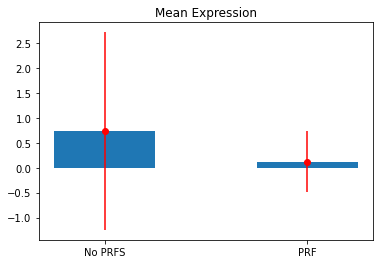

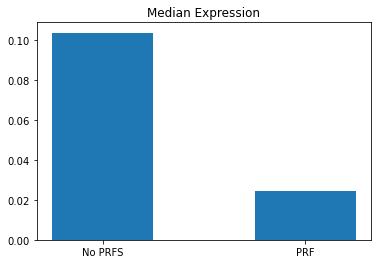

In [11]:

not_mean,not_median, not_sem = expresion_stats(not_prf_ids)
yes_mean, yes_median, yes_sem = expresion_stats(prf_ids)
plt.figure()
plt.bar(['No PRFS', 'PRF'], [not_mean, yes_mean], width = 0.5)

plt.title('Mean Expression')
plt.errorbar(['No PRFS', 'PRF'], [not_mean, yes_mean], yerr= [not_sem, yes_sem], fmt="o", color="r")

plt.figure()
plt.title('Median Expression')
plt.bar(['No PRFS', 'PRF'], [not_median, yes_median], width = 0.5)





In [12]:
print(not_sem)

1.982370159359856


# 1. look at all random sites compared to prf sites

/var/folders/7f/_vdp3w9j5r9_qyl5mkhz8pn00000gn/T/ipykernel_71758/3872106024.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = [21,9])


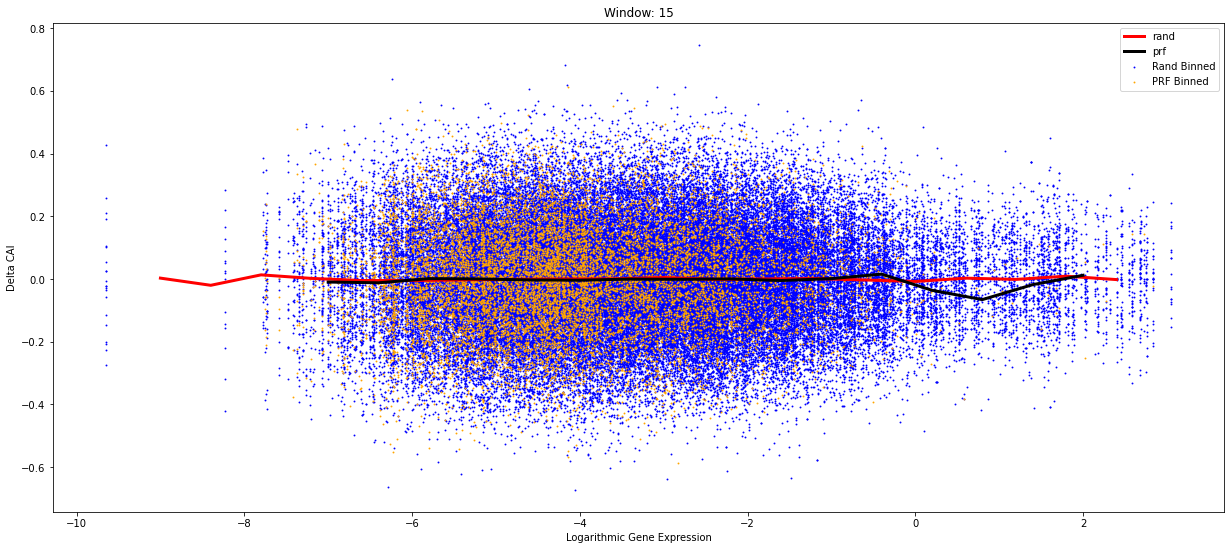

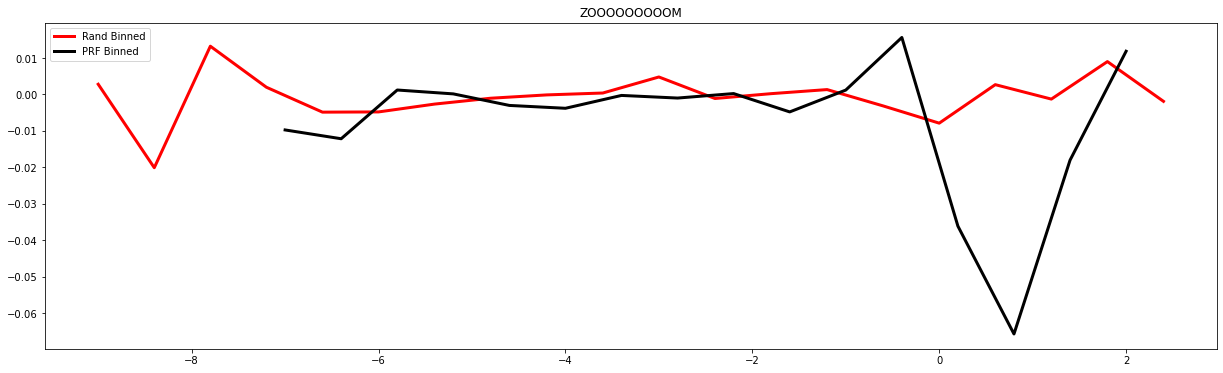

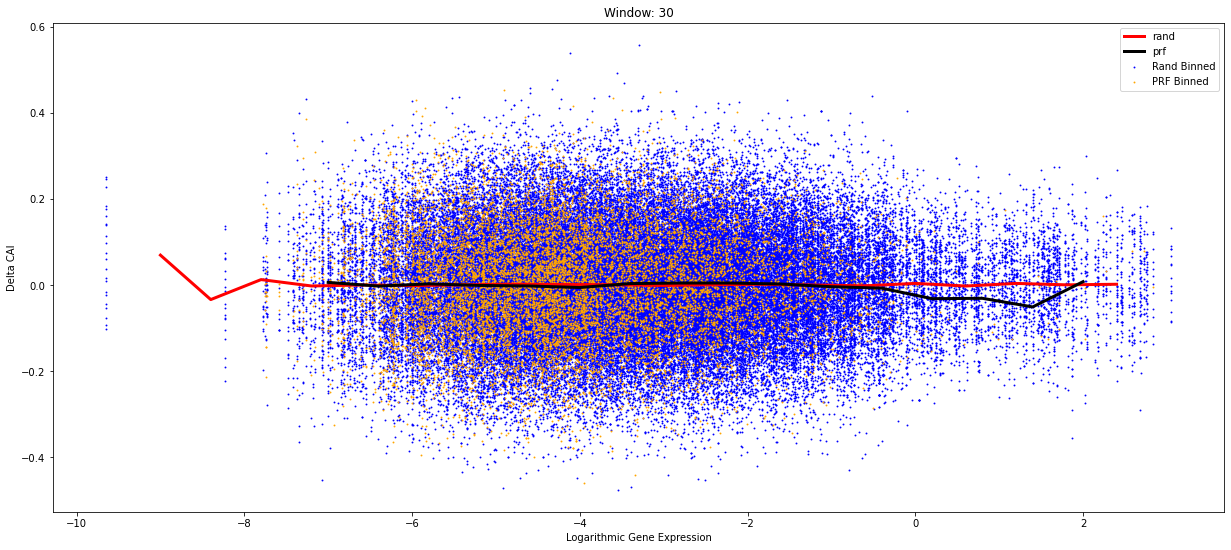

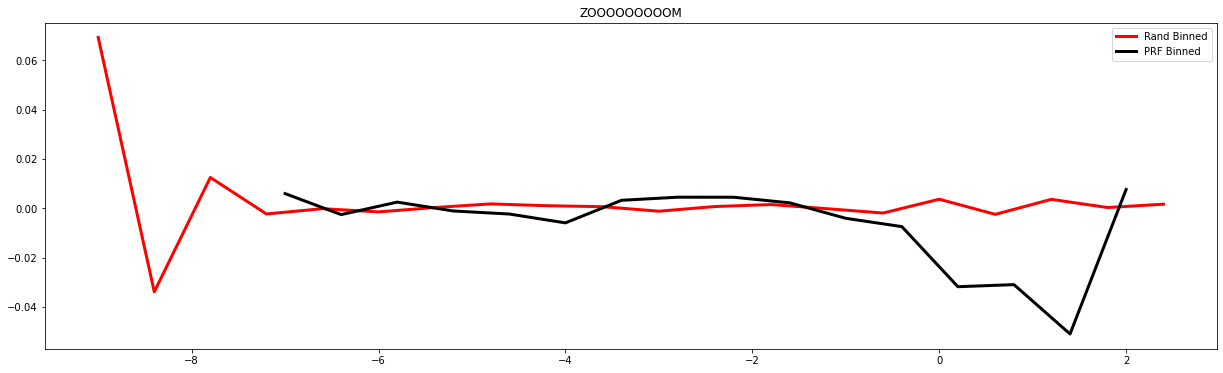

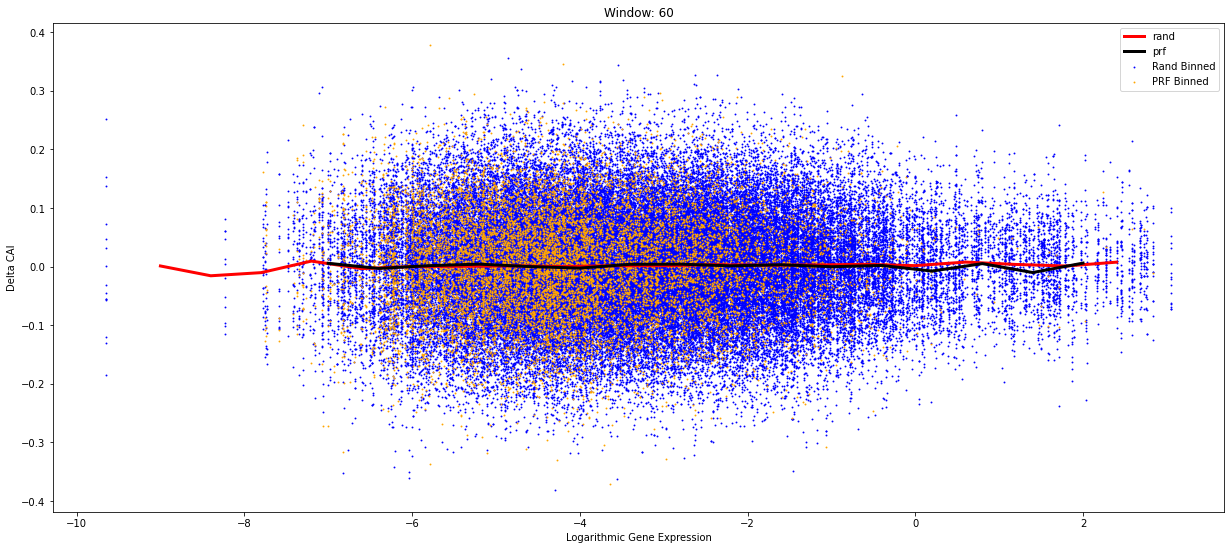

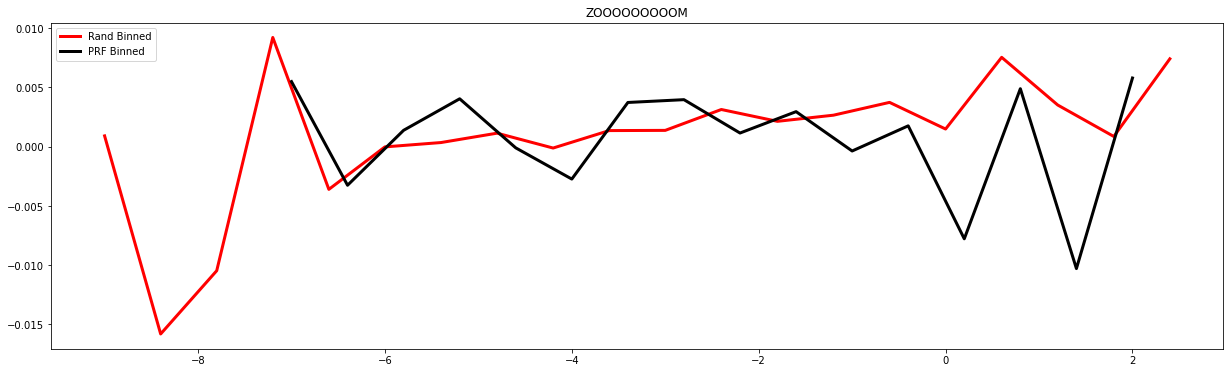

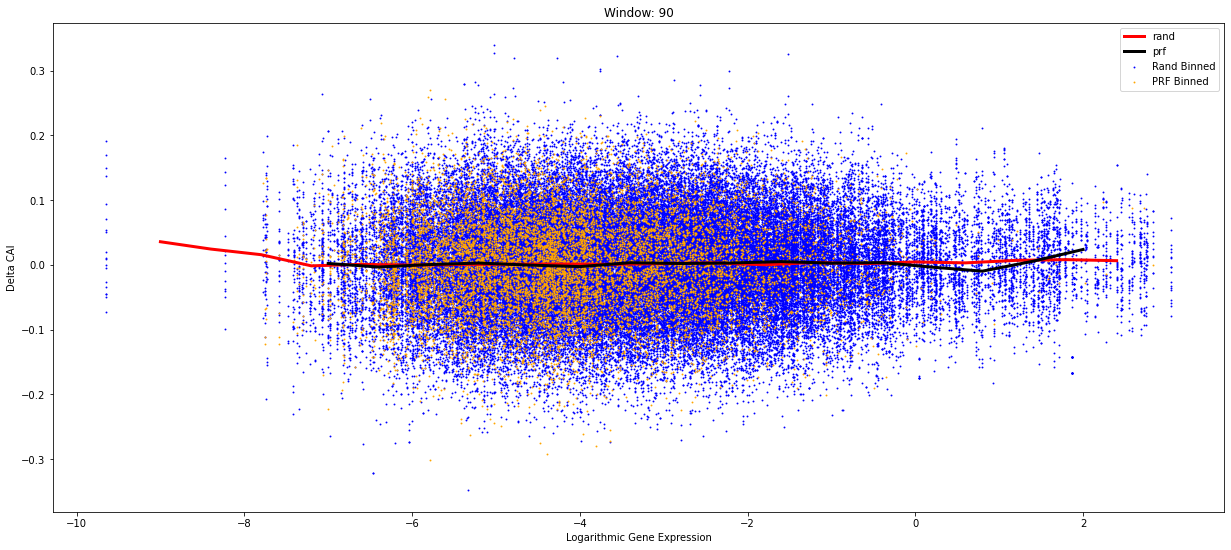

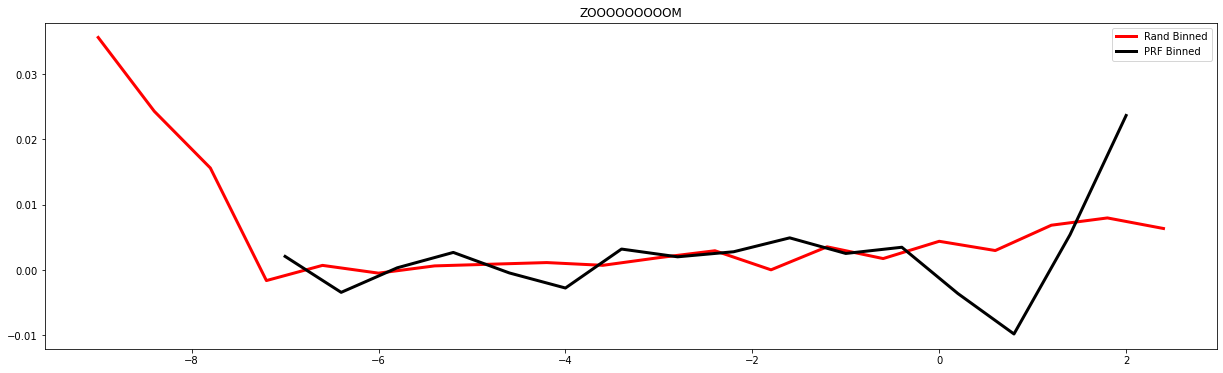

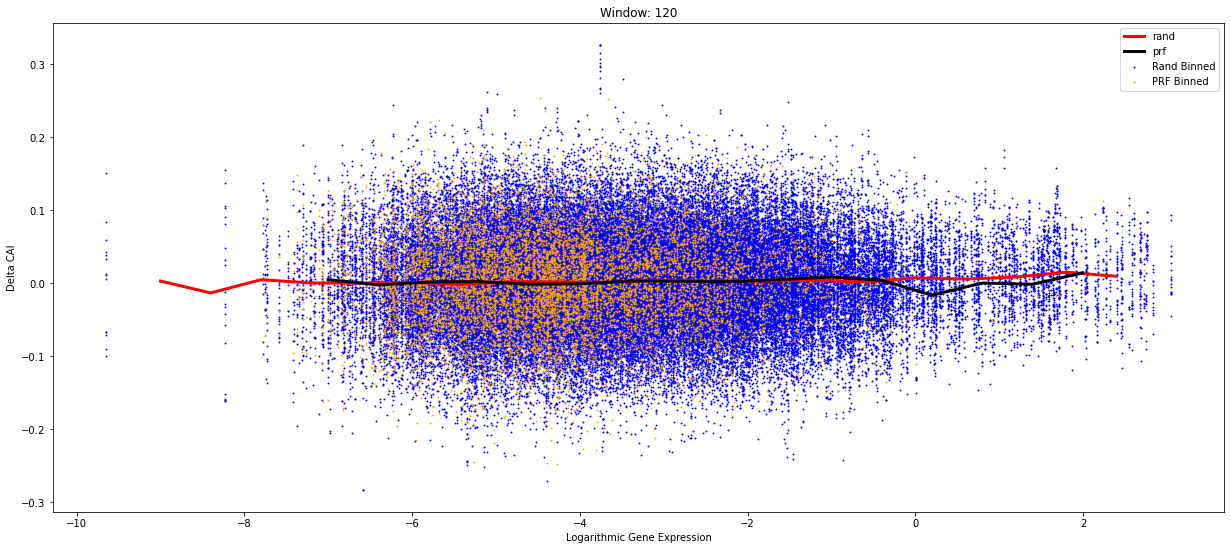

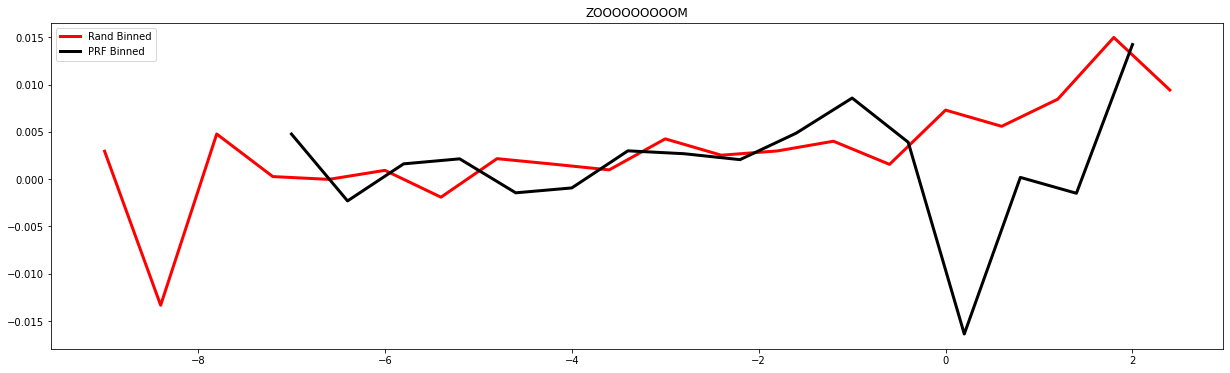

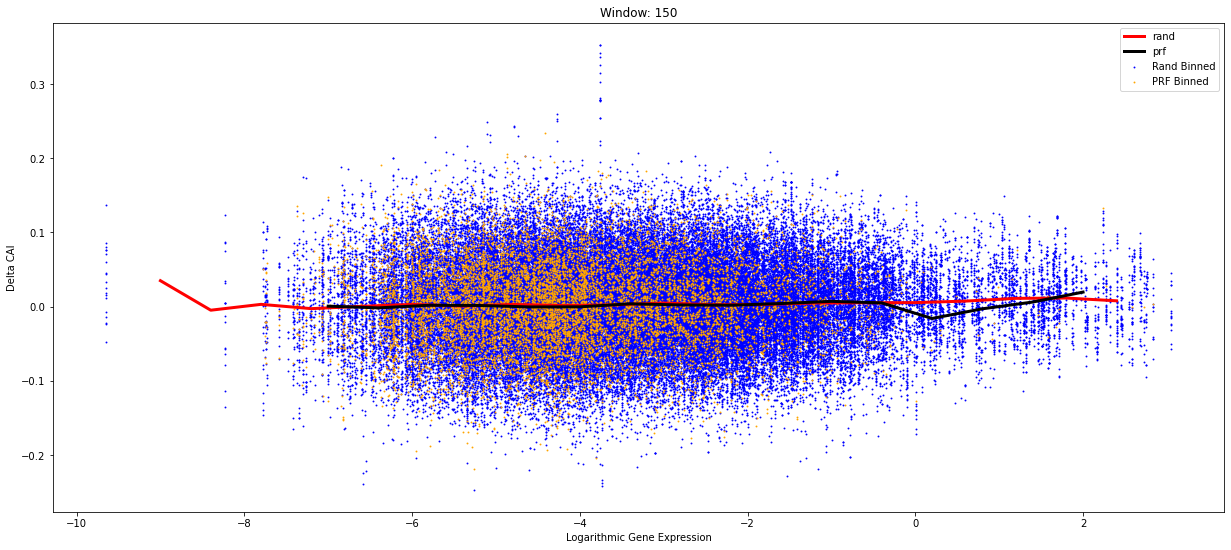

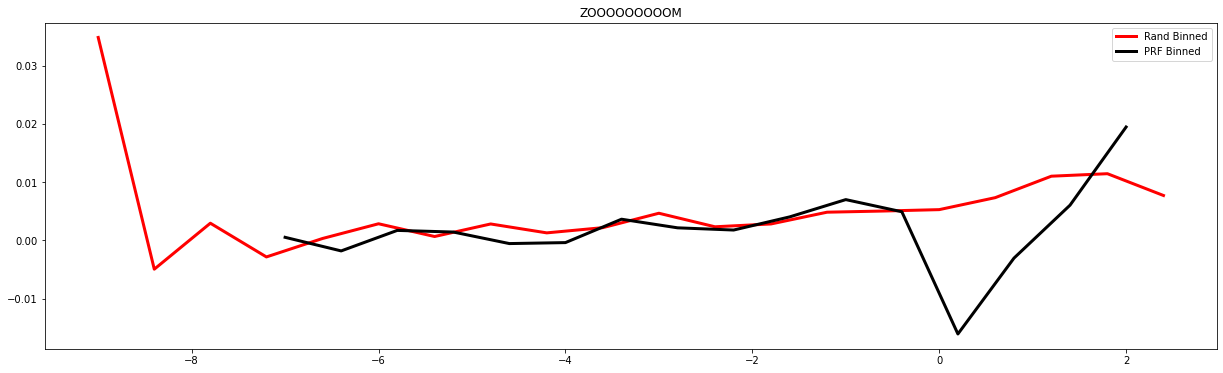

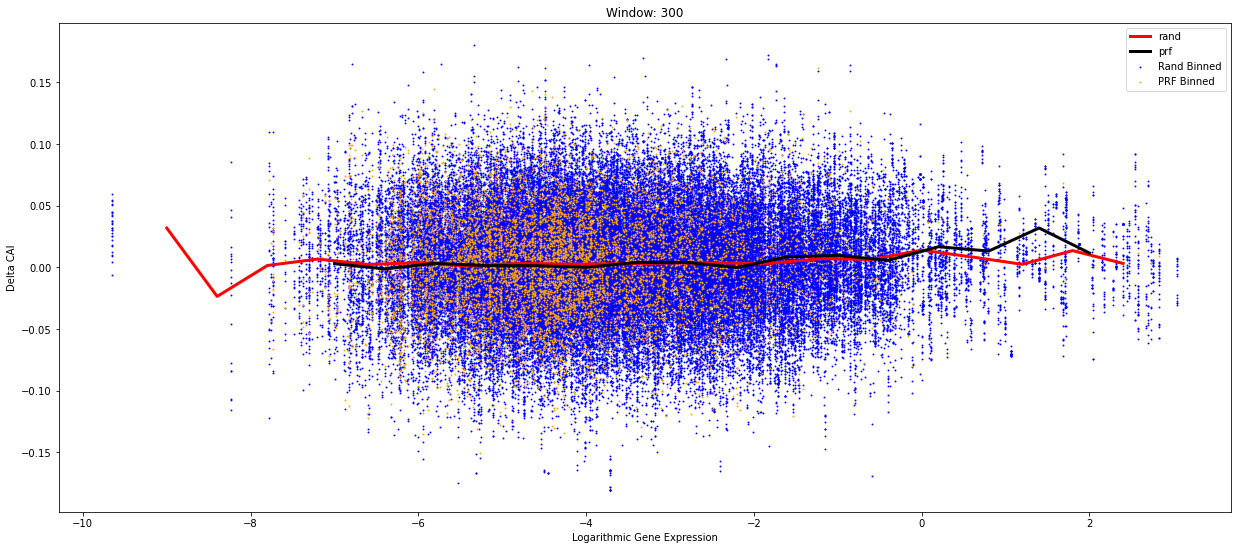

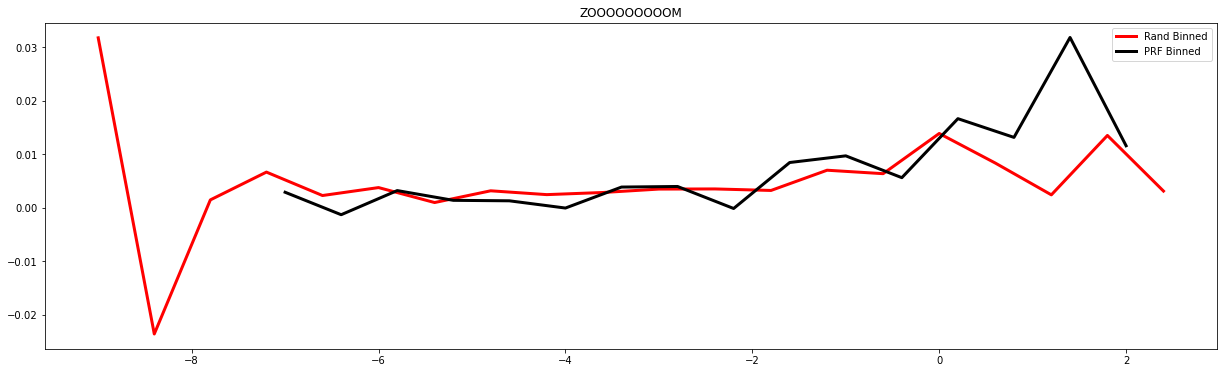

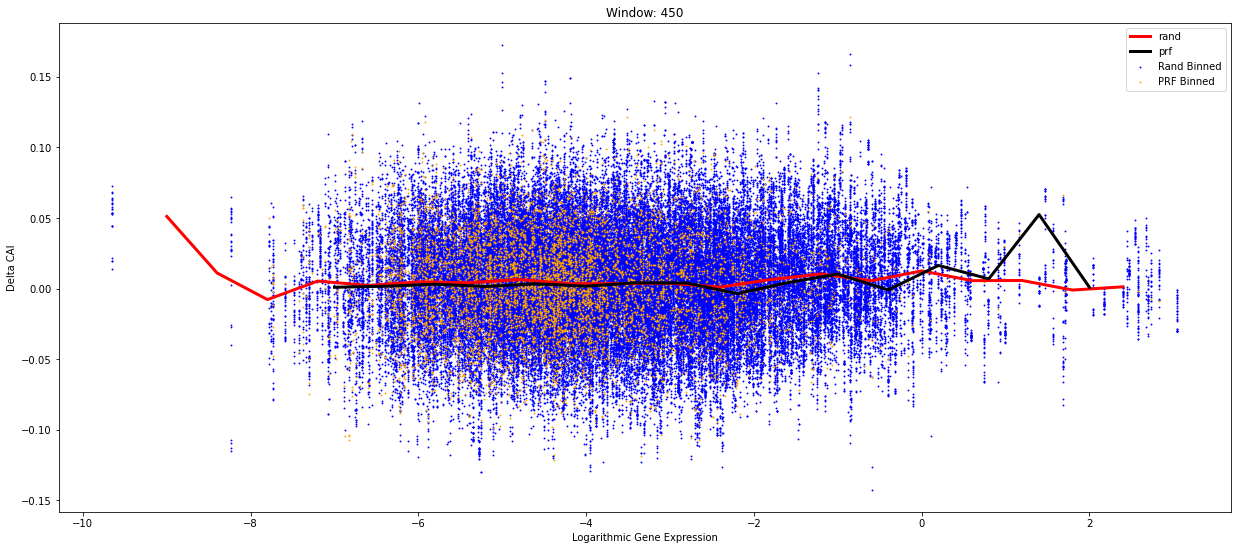

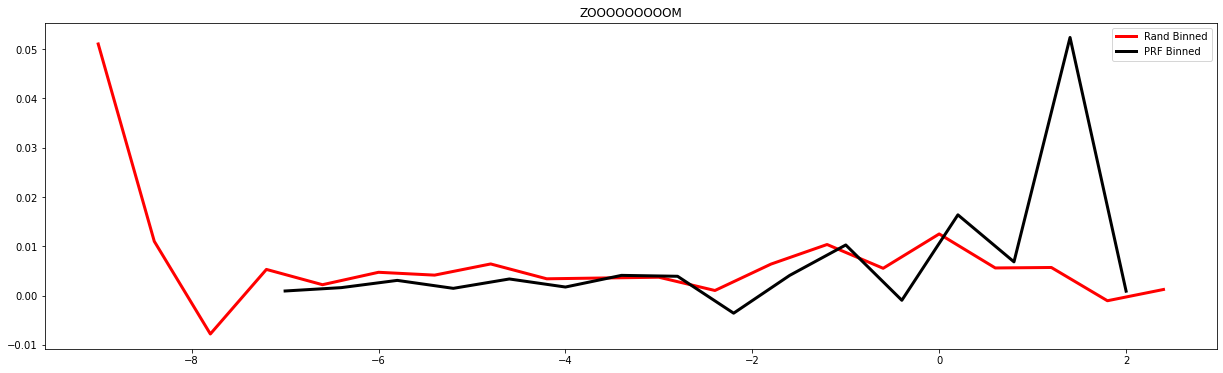

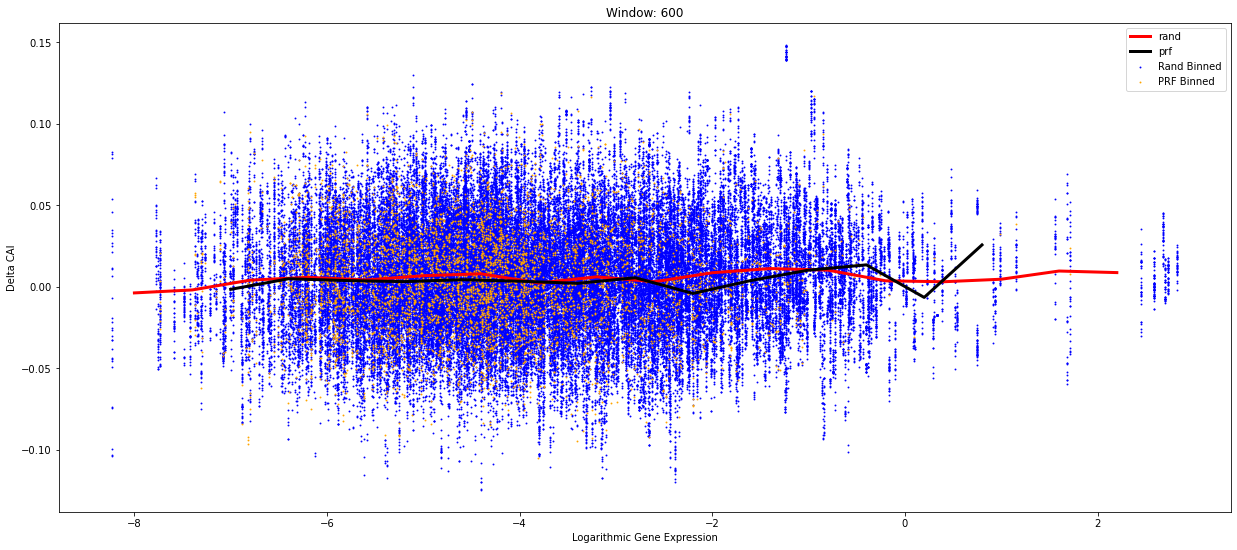

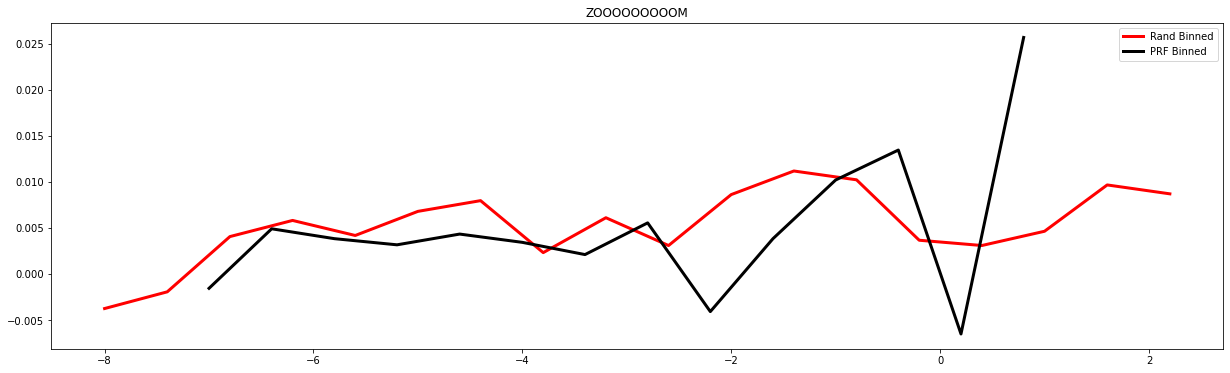

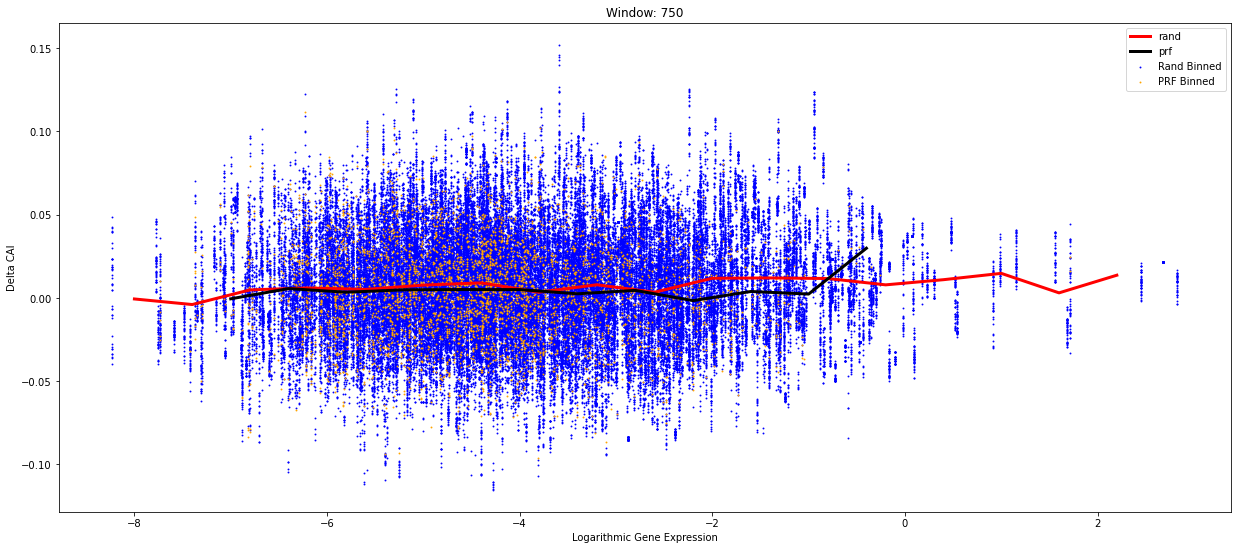

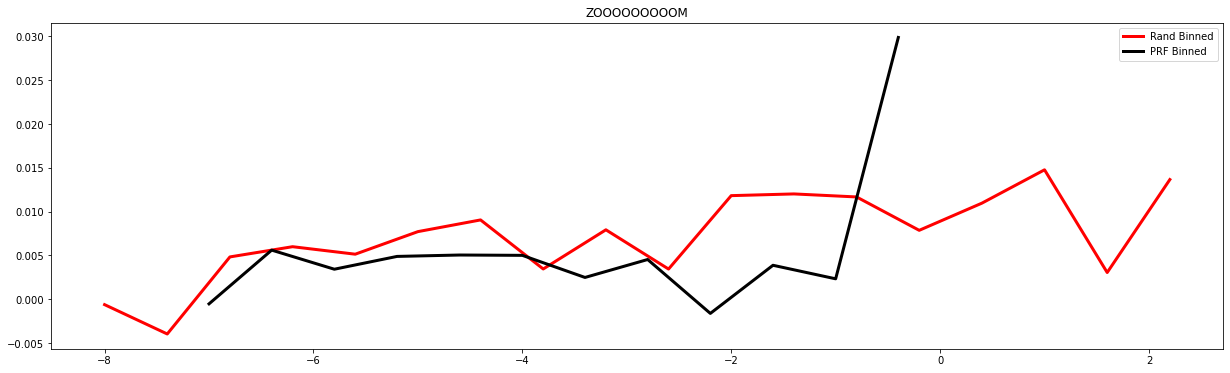

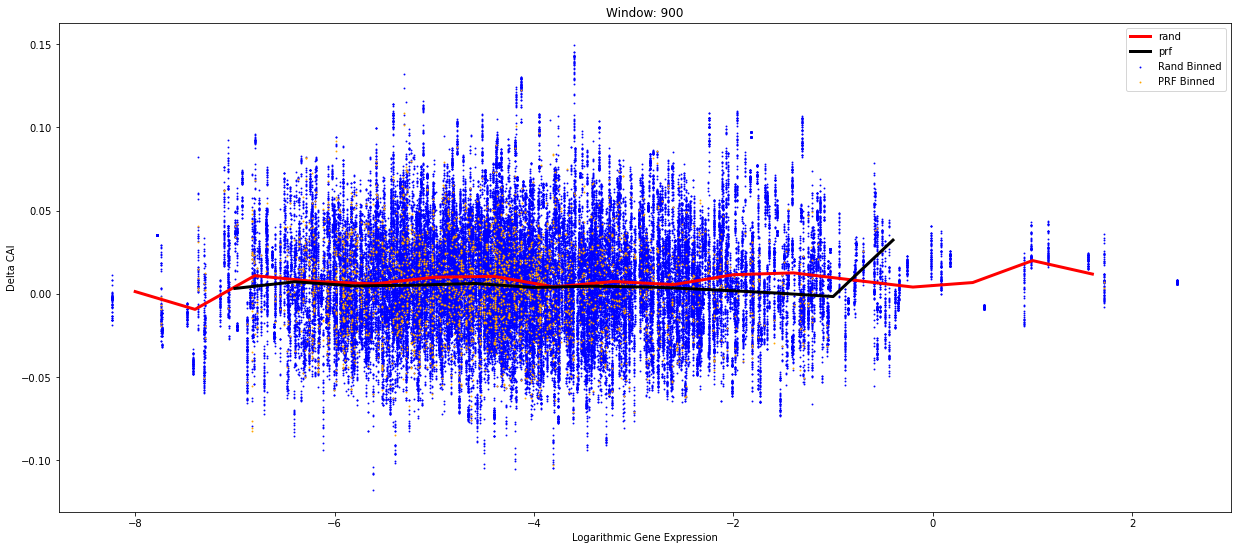

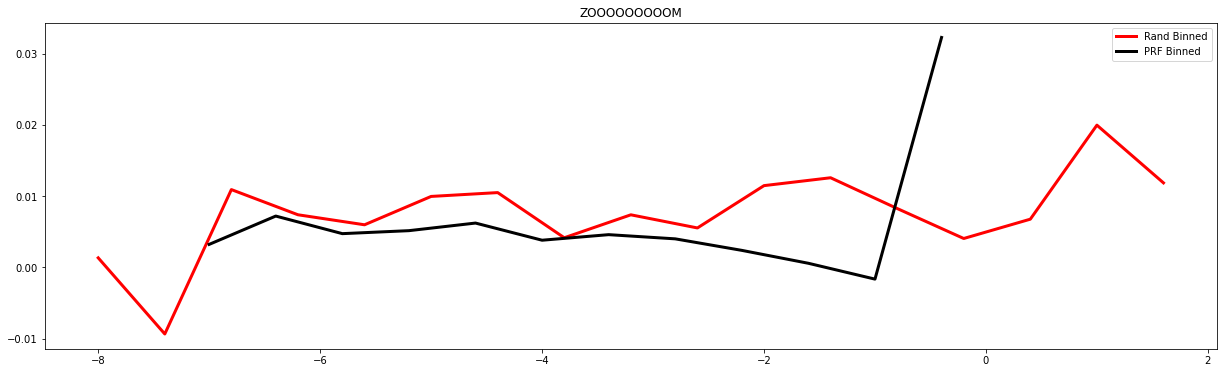

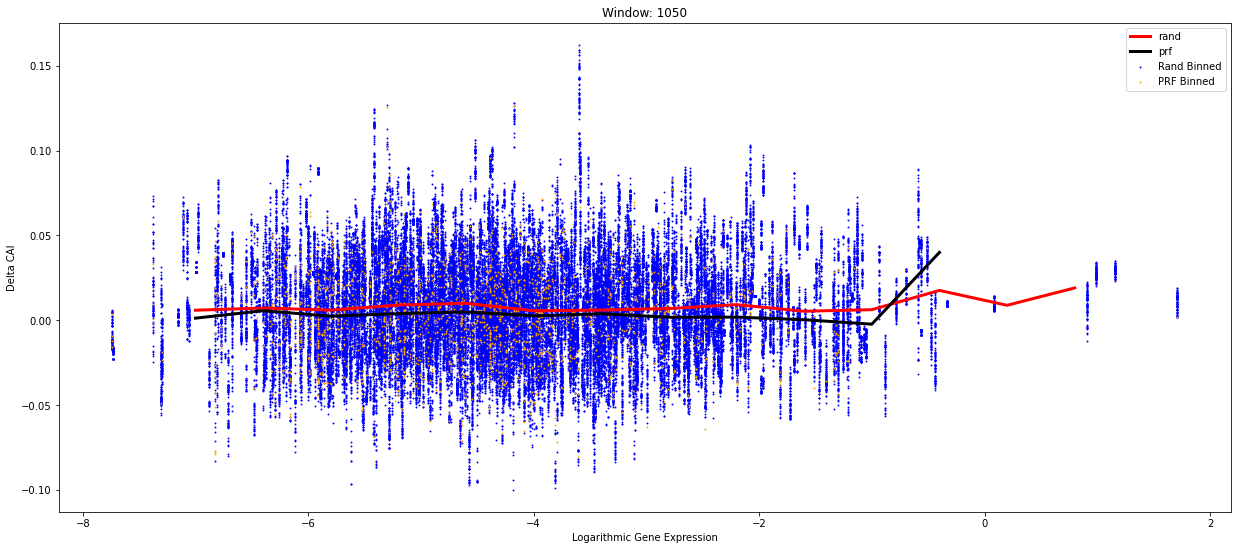

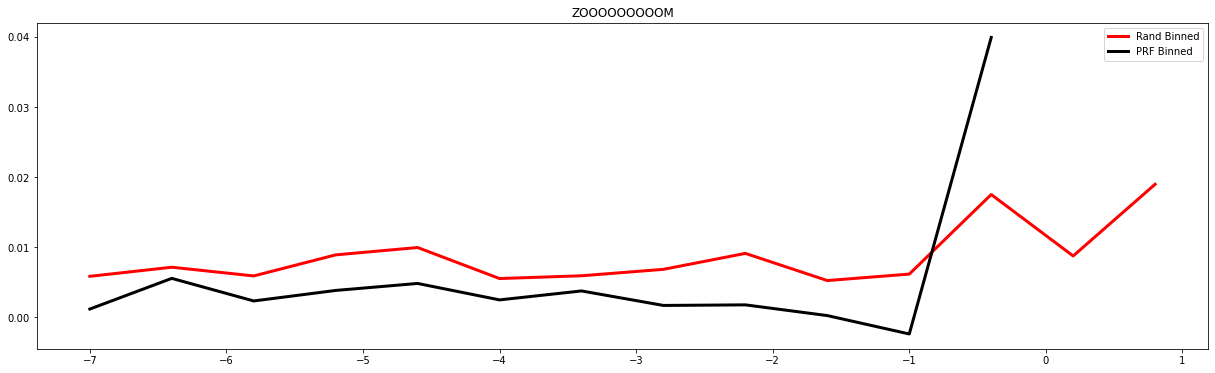

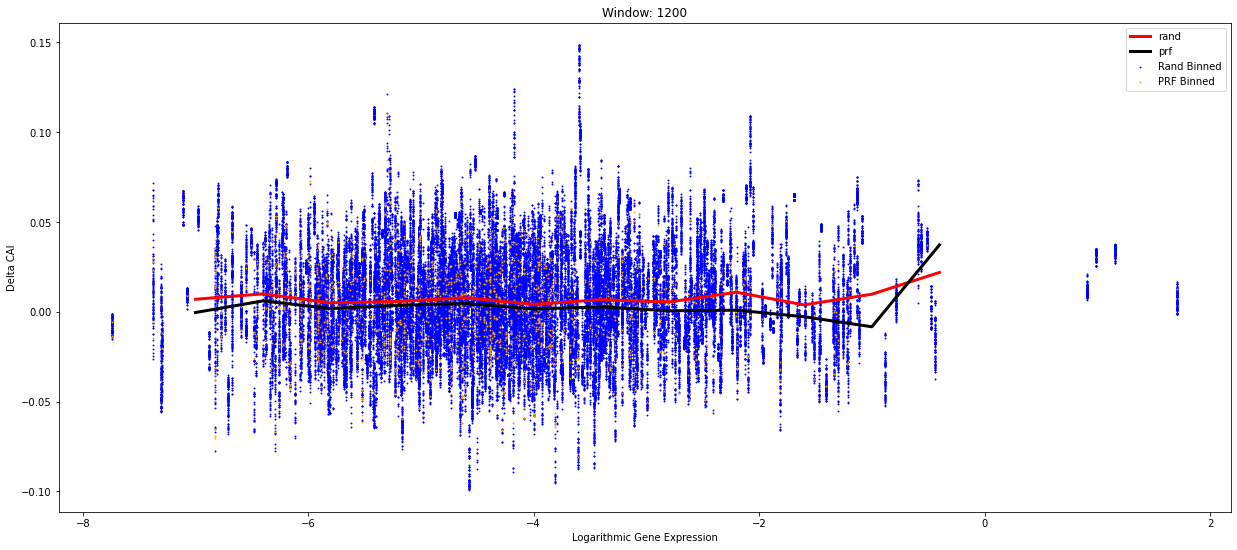

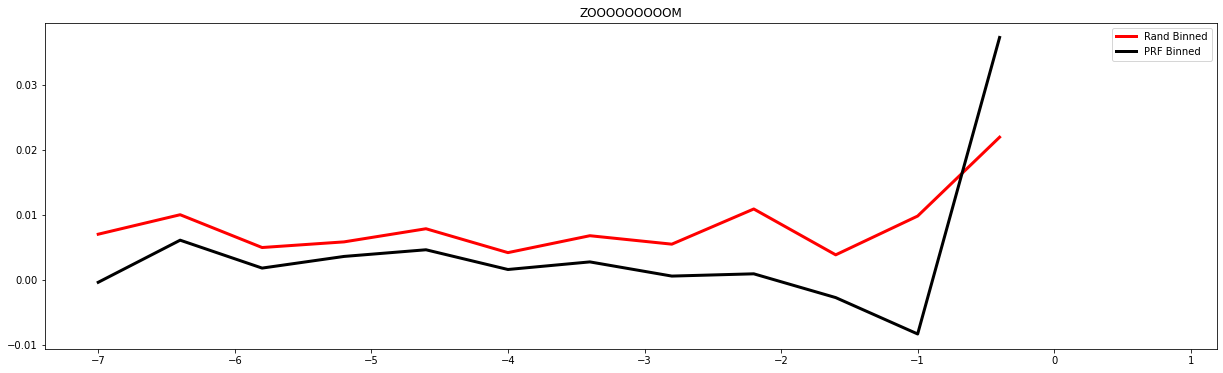

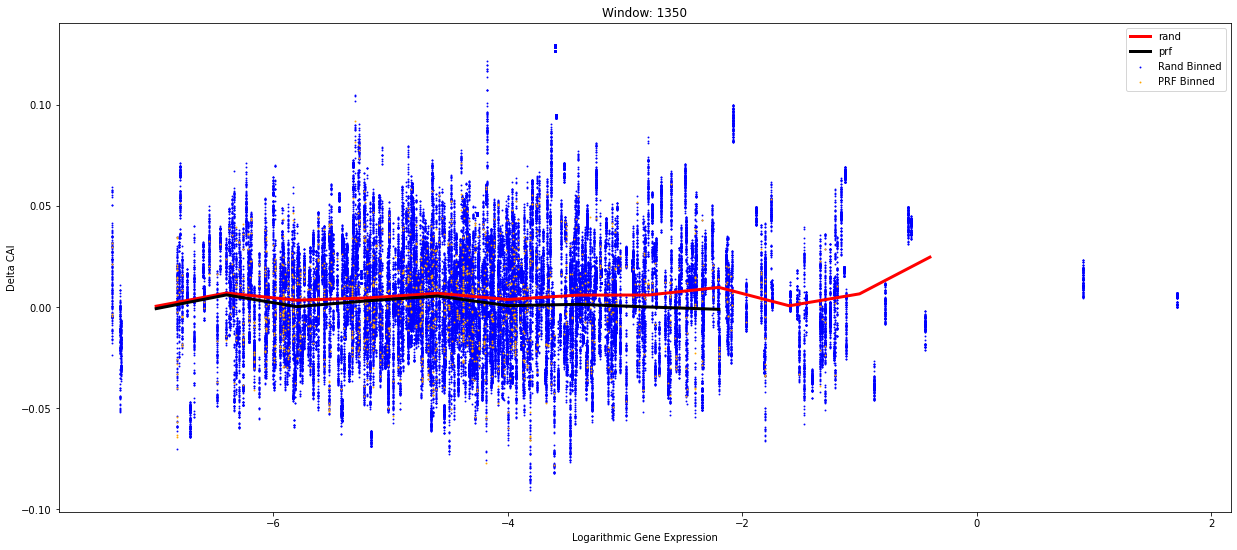

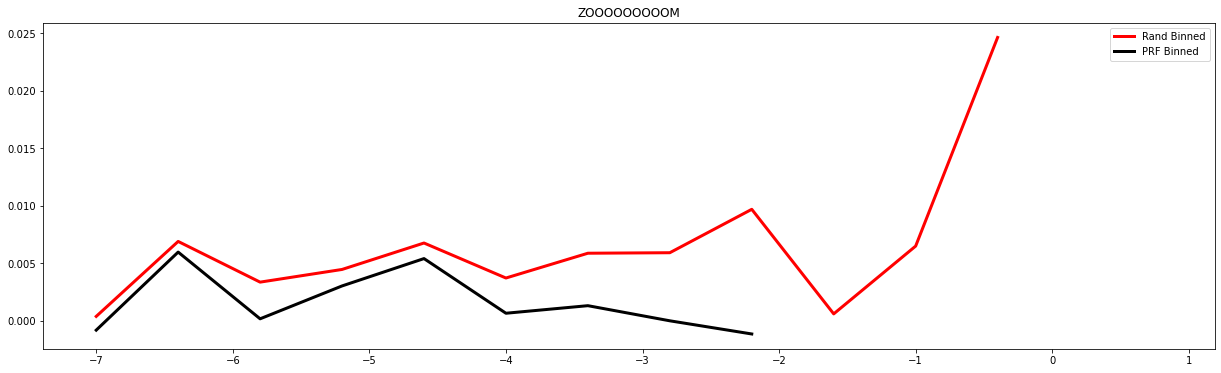

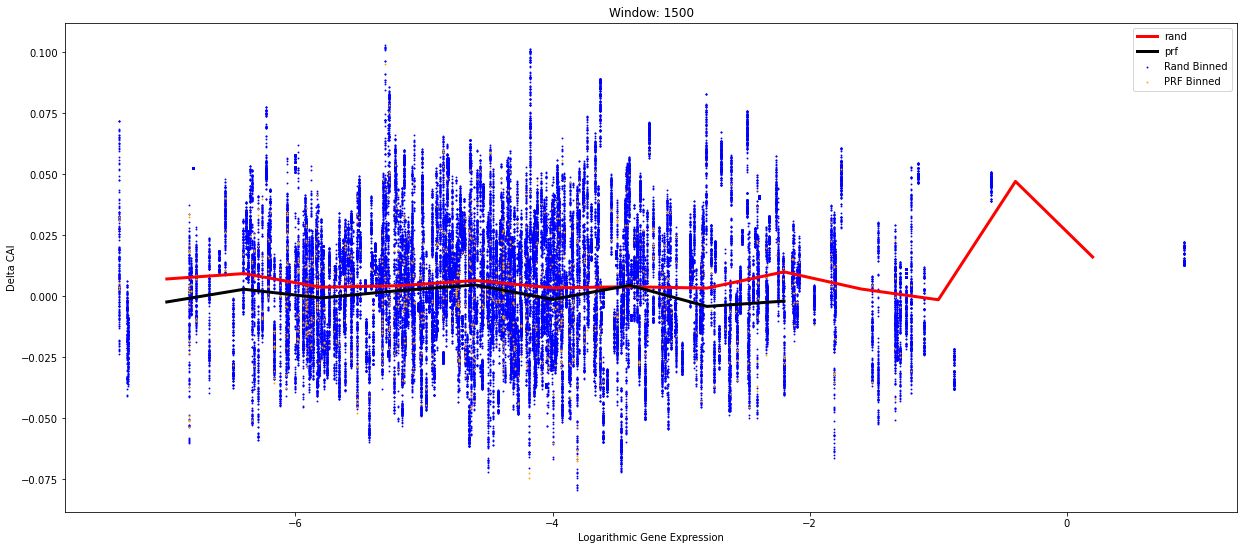

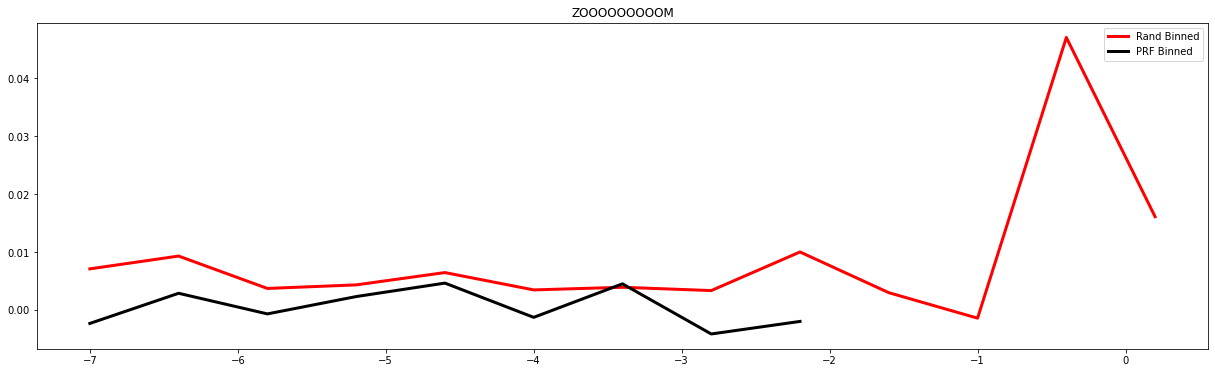

In [15]:
for w in all_windows: 
    
    #considering all random sites
    #try out only random sits from genes not in the prfdb after 
    file = 'all/all_random_locs_window'+ str(w)+'.tsv'
    file2 = 'all/all_prfdb_cai_window'+ str(w)+'.tsv'
    
    rand_cai_dict = {}
    with open(file, 'r') as f:
        exp = []
        cai = []
        nn = []
        for line in f: 
            if not line.startswith('#'):
                s = line.strip().split('\t')


                if s[0] in rand_cai_dict.keys():
                    temp = rand_cai_dict[s[0]]
                    temp.append(float(s[5]))
                    rand_cai_dict[s[0]] = temp
                else: 
                    rand_cai_dict[s[0]] = [float(s[5])]
            
    
    prf_cai_dict = {}
    with open(file2, 'r') as g: 
        for line in g: 
            if not line.startswith('#'):
                s = line.strip().split('\t')


                if s[0] in prf_cai_dict.keys():
                    temp = prf_cai_dict[s[0]]
                    temp.append(float(s[5]))
                    prf_cai_dict[s[0]] = temp
                else: 
                    prf_cai_dict[s[0]] = [float(s[5])] 
    
    rand_exp = []
    rand_cai = [] 
    for k in rand_cai_dict.keys():
  
        if k not in expression.keys():
            continue
  
        for v in rand_cai_dict[k]: 
            rand_cai.append(v)
            rand_exp.append(expression[k])
            
            
    prf_exp = []
    prf_cai = [] 
    for k in prf_cai_dict.keys():
  
        if k not in expression.keys():
            continue

        for v in prf_cai_dict[k]: 
            prf_cai.append(v)
            prf_exp.append(expression[k])
        
    
    
    
    plt.figure(figsize = [21,9])
    plt.title('Window: ' + str(w))

   
    
    plt.scatter(np.log(rand_exp),rand_cai, s = 0.8, color = 'blue')  
    plt.scatter(np.log(prf_exp),prf_cai, s = 0.8, color = 'orange')
    x,y = bin(np.log(rand_exp), rand_cai)
    px,py = bin(np.log(prf_exp), prf_cai)
    plt.plot(x,y, color = 'red', linewidth = 3)
    plt.plot(px,py, color = 'black', linewidth = 3)
    plt.xlabel('Logarithmic Gene Expression')
    plt.ylabel('Delta CAI') 
    plt.legend(['rand', 'prf', 'Rand Binned', 'PRF Binned']) 
    
    plt.figure(figsize = [21,6])
    plt.title('ZOOOOOOOOOM')
    plt.plot(x,y, color = 'red', linewidth = 3)
    plt.plot(px,py, color = 'black', linewidth = 3)
    plt.legend(['Rand Binned', 'PRF Binned'])
    
    


    
    

               
    
            
 


# 2. look at only random sites that come from genes with ZERO PRF sites on the gene compared to prfdb sites

In [16]:
for w in all_windows: 
    
    #considering all random sites
    #try out only random sits from genes not in the prfdb after 
    file = 'all/all_random_locs_window'+ str(w)+'.tsv'
    file2 = 'all/all_prfdb_cai_window'+ str(w)+'.tsv'
    
    rand_cai_dict = {}
    with open(file, 'r') as f:
        exp = []
        cai = []
        nn = []
        for line in f: 
            s = line.strip().split('\t')
            if s[0] in prf_ids:
                continue
            
            if s[0] in rand_cai_dict.keys():
                temp = rand_cai_dict[s[0]]
                temp.append(float(s[5]))
                rand_cai_dict[s[0]] = temp
            else: 
                rand_cai_dict[s[0]] = [float(s[5])]
            
    
    prf_cai_dict = {}
    with open(file2, 'r') as g: 
        for line in g: 
            s = line.strip().split('\t')
            
            
            if s[0] in prf_cai_dict.keys():
                temp = prf_cai_dict[s[0]]
                temp.append(float(s[5]))
                prf_cai_dict[s[0]] = temp
            else: 
                prf_cai_dict[s[0]] = [float(s[5])] 
    
    rand_exp = []
    rand_cai = [] 
    for k in rand_cai_dict.keys():
  
        if k not in expression.keys():
            continue
  
        for v in rand_cai_dict[k]: 
            rand_cai.append(v)
            rand_exp.append(expression[k])
            
            
    prf_exp = []
    prf_cai = [] 
    for k in prf_cai_dict.keys():
  
        if k not in expression.keys():
            continue

        for v in prf_cai_dict[k]: 
            prf_cai.append(v)
            prf_exp.append(expression[k])
        
    
    
    
    plt.figure(figsize = [21,9])
    plt.title('Window: ' + str(w))
    plt.scatter(np.log(rand_exp),rand_cai, s = 0.8, color = 'blue')  
    plt.scatter(np.log(prf_exp),prf_cai, s = 0.8, color = 'orange')
    x,y = bin(np.log(rand_exp), rand_cai)
    px,py = bin(np.log(prf_exp), prf_cai)
    plt.plot(x,y, color = 'red', linewidth = 3)
    plt.plot(px,py, color = 'black', linewidth = 3)
    plt.xlabel('Gene Expression')
    plt.ylabel('Delta CAI') 
    plt.legend(['rand', 'prf', 'Rand Binned', 'PRF Binned']) 
    
    plt.figure(figsize = [21,6])
    plt.title('ZOOOOOOOOOM')
   
    plt.plot(x,y, color = 'red', linewidth = 3)
    plt.plot(px,py, color = 'black', linewidth = 3)
    plt.legend(['Rand Binned', 'PRF Binned'])
    

ValueError: could not convert string to float: 'delta_CAI'

# Just for fun to say we did everything
### (╯°□°)╯︵ ┻━┻
## consider only random sites from genes that also have a prf site and compare those to prfdb sites

In [ ]:
for w in all_windows: 
    
    #considering all random sites
    #try out only random sits from genes not in the prfdb after 
    file = 'all/all_random_locs_window'+ str(w)+'.tsv'
    file2 = 'all/all_prfdb_cai_window'+ str(w)+'.tsv'
    
    rand_cai_dict = {}
    with open(file, 'r') as f:
        exp = []
        cai = []
        nn = []
        for line in f: 
            s = line.strip().split('\t')
            if s[0] in not_prf_ids:
                continue
            
            if s[0] in rand_cai_dict.keys():
                temp = rand_cai_dict[s[0]]
                temp.append(float(s[5]))
                rand_cai_dict[s[0]] = temp
            else: 
                rand_cai_dict[s[0]] = [float(s[5])]
            
    
    prf_cai_dict = {}
    with open(file2, 'r') as g: 
        for line in g: 
            s = line.strip().split('\t')
            
            
            if s[0] in prf_cai_dict.keys():
                temp = prf_cai_dict[s[0]]
                temp.append(float(s[5]))
                prf_cai_dict[s[0]] = temp
            else: 
                prf_cai_dict[s[0]] = [float(s[5])] 
    
    rand_exp = []
    rand_cai = [] 
    for k in rand_cai_dict.keys():
  
        if k not in expression.keys():
            continue
  
        for v in rand_cai_dict[k]: 
            rand_cai.append(v)
            rand_exp.append(expression[k])
            
            
    prf_exp = []
    prf_cai = [] 
    for k in prf_cai_dict.keys():
  
        if k not in expression.keys():
            continue

        for v in prf_cai_dict[k]: 
            prf_cai.append(v)
            prf_exp.append(expression[k])
        
    
    
    
    plt.figure(figsize = [21,9])
    plt.title('Window: ' + str(w))
    plt.scatter(np.log(rand_exp),rand_cai, s = 0.8, color = 'blue')  
    plt.scatter(np.log(prf_exp),prf_cai, s = 0.8, color = 'orange')
    x,y = bin(np.log(rand_exp), rand_cai)
    px,py = bin(np.log(prf_exp), prf_cai)
    plt.plot(x,y, color = 'red', linewidth = 3)
    plt.plot(px,py, color = 'black', linewidth = 3)
    plt.xlabel('Gene Expression')
    plt.ylabel('Delta CAI') 
    plt.legend(['rand', 'prf', 'Rand Binned', 'PRF Binned']) 
    
    plt.figure(figsize = [21,6])
    plt.title('ZOOOOOOOOOM')
   
    plt.plot(x,y, color = 'red', linewidth = 3)
    plt.plot(px,py, color = 'black', linewidth = 3)
    plt.legend(['Rand Binned', 'PRF Binned'])
    